In [1]:
import pytesseract
import pyautogui
import os
from PIL import Image
import PIL
from PIL.ImageGrab import grab as screenshot
import tempfile

In [2]:
tempdir = "paperclip"
os.makedirs(tempdir, exist_ok=True)

In [3]:
def make_paperclip(n=100):
    bbox = 10, 363, 113, 383
    x, y = 65, 373
    pyautogui.click(x,y,n,0)

In [4]:
def get_wire():
    bbox = 53, 754, 237, 774
    return screenshot(bbox)

In [5]:
import contextlib
@contextlib.contextmanager
def tmpf(suff):
    with tempfile.NamedTemporaryFile("wb+", dir=tempdir, suffix=suff, delete=False) as f:
        try:
            yield f
        except:
            raise
def tmpn(suffix):
    return tempfile.NamedTemporaryFile("wb+", dir=tempdir, suffix=suffix, delete=False).name

In [6]:
with tmpf(".tiff") as f:
    img = get_wire()
    img.save(f, "tiff")
    f.seek(0)
    print(pytesseract.image_to_string(img))

wer| ON


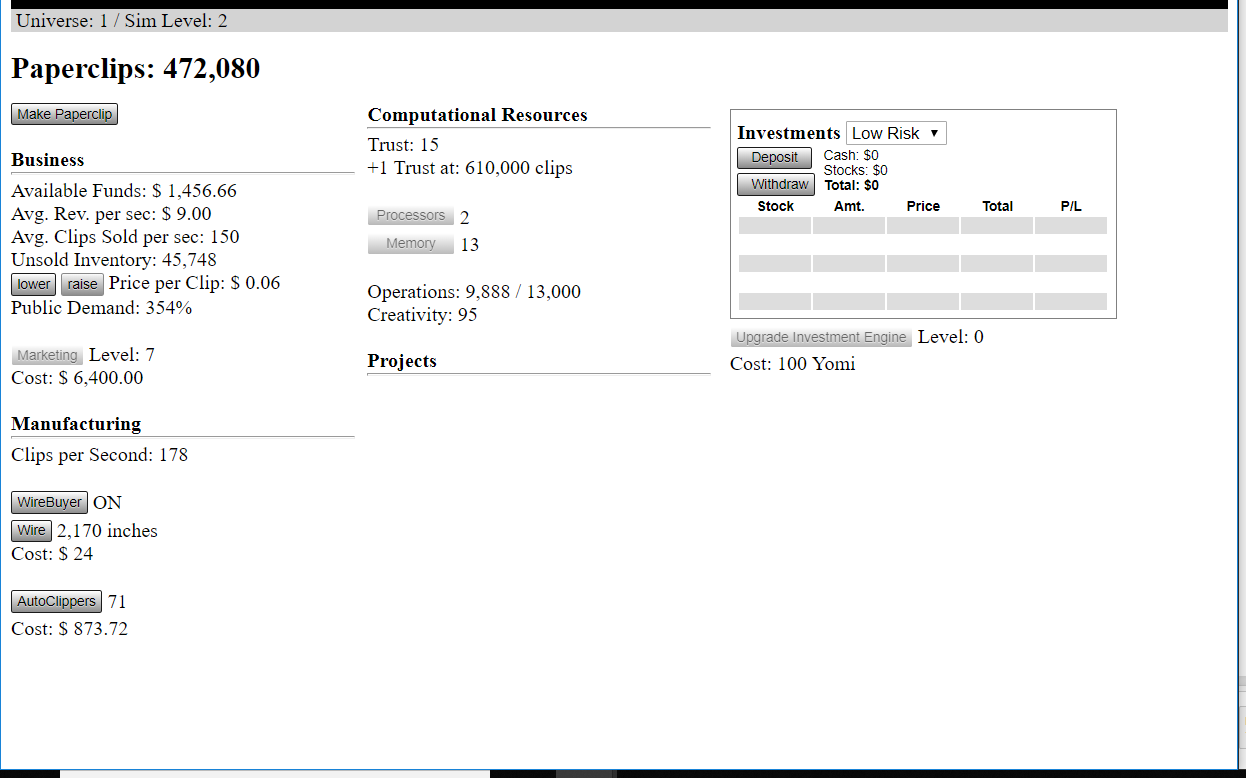

In [7]:
import win32gui

hwnd = win32gui.FindWindow(None, 'www.decisionproblem.com/paperclips/index2.html - Google Chrome')
bbox = win32gui.GetWindowRect(hwnd)
img = screenshot((0, 260, bbox[2], bbox[3]))
img

In [8]:
import cv2, numpy, numpy as np
opencvImage = cv2.cvtColor(numpy.array(img), cv2.COLOR_RGB2GRAY)

In [16]:
img = opencvImage
h, w = img.shape[:2]
kernel = np.ones((15,15),np.uint8)

e = cv2.erode(img,kernel,iterations = 2)  
d = cv2.dilate(e,kernel,iterations = 1)
ret, th = cv2.threshold(d, 1, 255, cv2.THRESH_BINARY)

mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(th, mask, (200,200), 255); # position = (200,200)
out = cv2.bitwise_not(th)
out= cv2.dilate(out,kernel,iterations = 3)
_, cnt, h = cv2.findContours(out,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(cnt)):
            area = cv2.contourArea(cnt[i])
            if(area>100 and area<10000000):
                  mask = np.zeros_like(img)
                  cv2.drawContours(mask, cnt, i, 255, -1)
                  x,y,w,h = cv2.boundingRect(cnt[i])
                  crop= img[y:h+y,x:w+x]
                  cv2.imshow("snip",crop )
                  if(cv2.waitKey(0))==27:break

cv2.destroyAllWindows()